In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import seaborn as sns

In [2]:
df=pd.read_csv('greendestination.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [31]:
attrition_rate = (df['Attrition'] == 'Yes').sum() / len(df) * 100
# attrition_rate = (df['Attrition'].value_counts()['Yes'] / len(df)) * 100

In [32]:
print(f'Attrition Rate: {attrition_rate:.2f}%')

Attrition Rate: 16.12%


distribution of ages for employees who have left vs. those who have stayed: Histogram

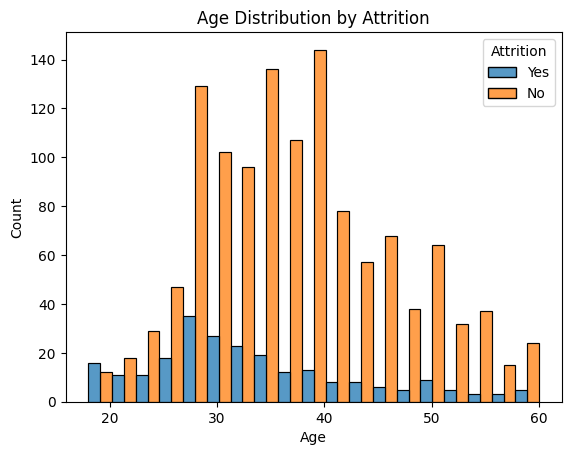

In [33]:
sns.histplot(x='Age', hue='Attrition', data=df, multiple='dodge')
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

boxplot to visualize the distribution of years at the company for employees who have left vs. those who have stayed:

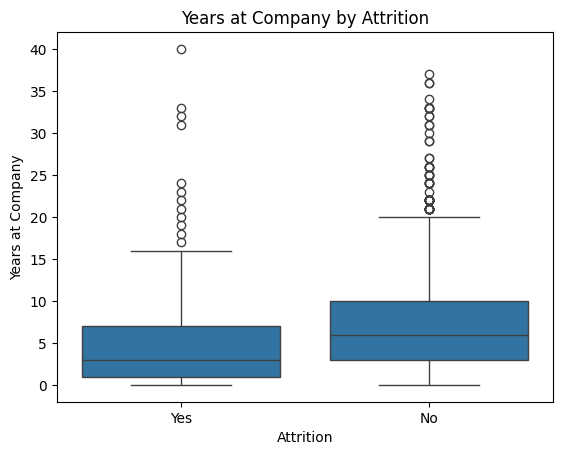

In [34]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

scatter plot to visualize the relationship between income and attrition:

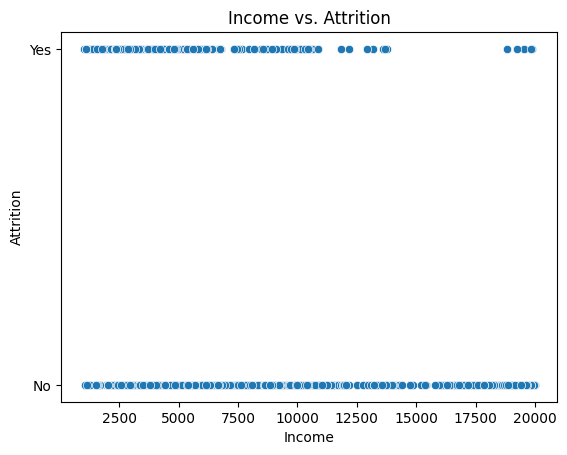

In [37]:
sns.scatterplot(x='MonthlyIncome', y='Attrition', data=df)
plt.title('Income vs. Attrition')
plt.xlabel('Income')
plt.ylabel('Attrition')
plt.show()

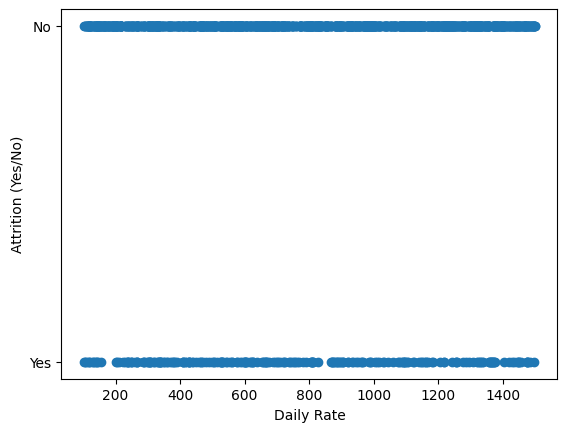

In [26]:
plt.scatter(df['DailyRate'], df['Attrition'])
plt.xlabel('Daily Rate')
plt.ylabel('Attrition (Yes/No)')
plt.show()

In [28]:
# Filter the data for those who left
left_df = df[df['Attrition'] == 'Yes']

# Filter the data for those who stayed
stayed_df = df[df['Attrition'] == 'No']

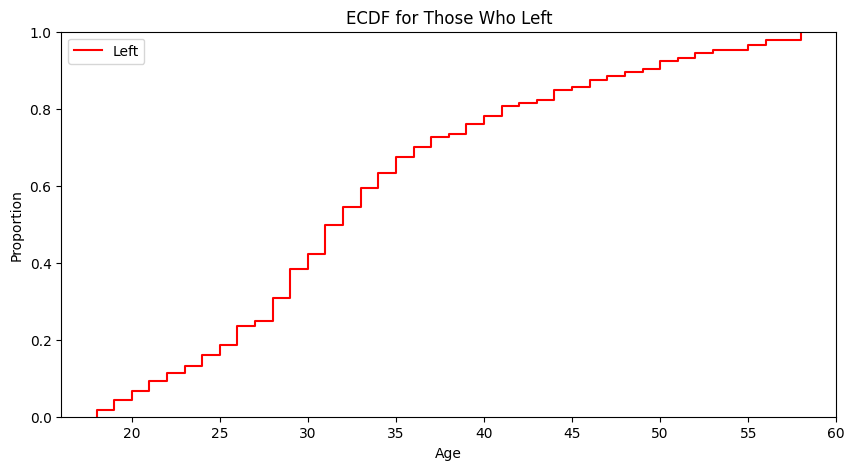

In [29]:
# Create an ECDF plot for those who left
plt.figure(figsize=(10, 5))
sns.ecdfplot(left_df['Age'], color='r', label='Left')
plt.title('ECDF for Those Who Left')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend()

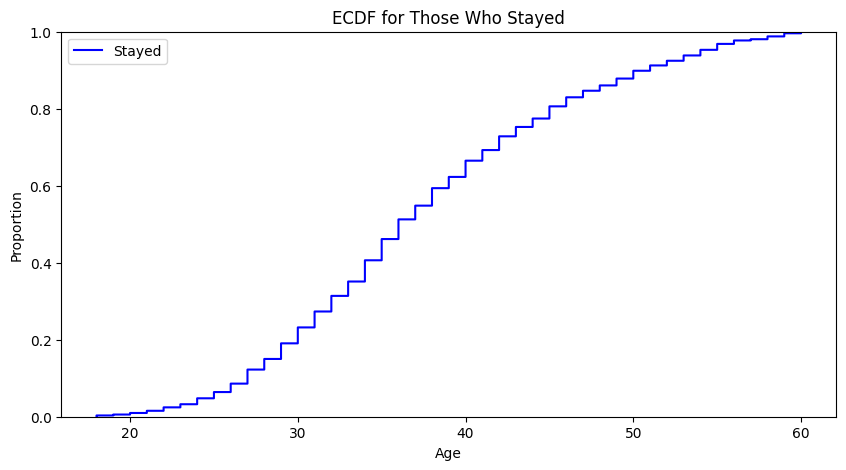

In [30]:
# Create an ECDF plot for those who stayed
plt.figure(figsize=(10, 5))
sns.ecdfplot(stayed_df['Age'], color='b', label='Stayed')
plt.title('ECDF for Those Who Stayed')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend()

Correlation Analysis

To quantify the relationships between these factors and attrition, we can perform a correlation analysis using the corr() function:

In [42]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [43]:
corr_matrix = df[['Age', 'YearsAtCompany', 'MonthlyIncome', 'Attrition']].corr()
print(corr_matrix)

                     Age  YearsAtCompany  MonthlyIncome  Attrition
Age             1.000000        0.311309       0.497855  -0.159205
YearsAtCompany  0.311309        1.000000       0.514285  -0.134392
MonthlyIncome   0.497855        0.514285       1.000000  -0.159840
Attrition      -0.159205       -0.134392      -0.159840   1.000000
